# *Console Gaming: Forecasting  an Industry's Survival*
### _by Anmol Srivastava, Iniyan Chezhian, & Pamela Caroline_

### *A Dying Breed?*
In broad terms, console gaming has a cultural standing that is hard to replace; for gamers and non-gamers alike, the very mention of a video game brings to mind images of an Xbox controller, a GameBoy, or a Wii remote. Certainly, many of the same people are aware of mobile games, PC games, and games played in wildly different virtual-reality environments. However, the iconography of certain consoles, or of certain console games and franchises, is undeniable. 

At the same time, there's much speculation that consoles are headed towards an inevitable replacement by both the aforementioned 'modern' gaming platforms and other, unexplored systems. Below, we've provided two reports on the matter. The first (from a technology-oriented site) highlights a recent inability of console launches to boost struggling game sales. Citing that older consoles are seeing declines in overall purchases, it argues that console-exclusive games can be user-hostile, requiring expensive set-ups and constant updates to remain functional. Conversely, the second source (a financial report) argues that based on console games' current market domination, the console industry may see its biggest boost ever within the next five years. 
    - https://www.cnet.com/news/video-game-industry-struggles-to-grow-a-year-after-new-console-launches/
    - https://www.grandviewresearch.com/industry-analysis/gaming-console-market 
   
### *Why should you care - and what can you learn - about this issue?*
Clearly, this is a multi-faceted issue in need of clear-cut further analysis. And not just video-gamers are affected by this topic! Many life-changing innovations are dervied from gaming equipment and theory. For instance, the Xbox Kinect can be used to develop concussion analysis and treatment options. But at the same time, modern VR technology is becoming increasingly used in military __and__ medical training, a trend that traditional consoles have little place in. The respective summaries for these advances are below.   
    - https://www.nbcwashington.com/news/health/Md-Teen-Develops-New-Concussion-Tool-After-Serious-Injury-351209771.html
    - https://medcitynews.com/2017/10/medical-education-through-competitive-virtual-reality-video-games/
    - https://science.howstuffworks.com/gamer-soldier2.htm

So, where to put our time and resources? In familiar consoles or risky, cutting-edge, non-traditional equpiment? This debate will have seismic impacts. Many markets depend on video games' innovative hardware and software tools: tools that further our ability to visualize, compute, and store information. 

You, on the other hand, may simply be an avid gamer that is concerned about new consoles' desperate prioritization of online play over local play. Or perhaps you're considering getting into niche PC games, or are curious about the viability of popular smartphone games. 

### *Why take the data approach?*
Of course, we want to form informed stances on the matter, whether our interest in video games is in pursuit of entertainment, innovation, or progress. Doing this small data-oriented exploration will, at the least, help you and others get your foot in the data-science door. If *your* perspective as a user or creator had any weight on the matter, you'd likely want to reason with confidence about the fate of the industry! It's that very confidence that this tutorial will give you. 

Equally relevantly, video game companies use data in a marketing sense, too - it's far from a new practice. Using data analytics and foresight is huge in many modern businesses (such as stocks or social media). So it makes sense that companies have begun processing big data regarding sales, ratings, and popular use of their products. See these links, from data-science and video-game blogs, respectively, for examples:
    - http://www.ibmbigdatahub.com/blog/big-data-analytics-adds-new-market-plays-video-game-industry
    - https://wearerealitygames.com/2016/05/11/the-use-of-big-data-in-the-video-game-industry/
    
Consider this, from the Reality Games link: video game corporations are just now figuring out that an approximate half of their base are female players, by logging account usage on consoles and PCs. Only now are they beginning to represent and cater to those players. Imagine how else we could improve their business model, even outside of this project. By documenting who's logging in, what they're drawn to, how they play, and more, an *even broader* and more inclusive gaming commmunity can be made. 

*Our* goals are to identify the 'what' - which games and platforms are rising and falling in the industry? In pursuing this aim, we'll identify key differences in various game-types' successes, assess the factors that contribute to those successes, and gauge where the market for this form of entertainment is headed. 

### *What you'll be investigating...*
    - Are the sales-rates for games of different platforms changing significantly with time?
    - If so, are standard console games' sales faltering in that changing environment?
    - Which factors contribute to sales, and can they be modelled to predict sales?
    
For all this, we'll be using the Python programming language, some data, and data-science concepts. It's ok if you don't have experience with these! You'll be going on a step-by-step walkthrough of a typical data-oriented analysis project. Here, your data will be about the financial successes of the video game industry, and your analysis will evaluate console performance in regards to other forms of gaming. Then, you will:
    - collect relevant data on industry performance
    - process the data and prepare it for statistical analysis
    - perform introductory exploration of the data to determine hypotheses of interest
    - test theories, use machine learning to model aspects of the data, and test your models
    - yield useful insight from your results, and address the flaws of your experimentation

## Step 1: Data Collection
First note that our data is hosted at the following site, and can be accessed directly via the 'Download' option. The data, in broad terms, covers critical and commercial data regarding all major-brand game  releases, from various developers, and on various platforms. It does so for games from (at the earliest) 1982 up until December of 2016. Further details are explained below. 
    - https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings/data
   
Now, this step is actually pretty straightforward! We import *pandas* and *numpy*, libraries that will help us store, organize, and process our data. We navigate to the download option of the above site, and find the exact URL address of the dataset on the Kaggle server. We use that address, and a pandas library function, to read that dataset into a desirable format, and then output a portion of it to see what we have.

__Note__! Since obtaining the csv file from Kaggle requires login authorization, we are going to use a public re-upload of the file on GitHub instead.

In [1]:
# import the libraries that will help us manage and analyze data
import pandas as pd
import numpy as np

# retain as a string variable the source of the csv file
page = 'https://github.com/otacke/udacity-machine-learning-engineer/raw/master' 

# retain as a string variable the exact url extension of the csv file
csv = '/submissions/capstone_project/data/Video_Games_Sales_as_at_22_Dec_2016.csv'

# combine the string variables, load the csv file into a pandas dataframe
df = pd.read_csv(page + csv)

# output a sample of the data for context and correctness
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


##### A brief summary:
So, what does our initial data look like? Each row represents a unique game, distinguished by name. A game has a platform, release year, publisher, and developer as attributes or columns. Other attributes further describe a game, such as Genre and Rating. Also, there are critics' and users' scores, indicating (on average) how games were received by each. The count attributes for these columns represent the number of people that contributed to that average. 

Finally, we have a plethora of sales information. Refer to the source page for full details. In summary, sales are in millions of units. NA_sales refers to North American Sales, EU to the European Union, JP to Japanese, Global to worldwide sales, and Other to possible sales in Asia, Africa, or South America. 

This is a lot to take in - in the next step, we'll make sense of parts of it!

## Step 2: Data Processing
__Note__! Python is an easy language to intuit, but if you're curious about the inner workings of the commands we use to operate upon our dataset, explore these documentations for the *pandas* and *numpy* libraries, which outline the functions we will use to transform and process the dataframe. 
    - https://pandas.pydata.org/pandas-docs/stable/dsintro.html
    - https://docs.scipy.org/doc/numpy/reference/

Our data is messy and extraneous. We'll remove features that don't relate to our analysis. Japanese and EU sales are too niche of a category - let's instead focus on American and global sales, and remove the others. Scores from critics and users may matter, but their counts are removable. Finally, we keep the platform (consoles vs. non-consoles) column, but disregard publishers, developers and maturity ratings (which are better-explained by platform and genre).

Next, we'll sort the data by year and then by name, in ascending order. After that, we'll peek at the unique platform brands found in the data (printed below), and rename them in a clearer way. Essentially, one re-labelling will be for the portable (Nintendo, Gameboy, and PlayStation) consoles, and another for the non-portable PlayStation and Xbox consoles. PC and Dreamcast are, for now, left as is. 

__Note__! PC and Dreamcast are the only atypical gaming types in this set. And Dreamcast is an old system! It can transform into a handheld OR standard console, but is very outdated. Hence, we'll remove entries with Dreamcast games. So PC is our only gauge of non-console gaming. However, per our prior (and other) sources, the conversation regarding consoles' demise is centered around rising PC use, so this is an acceptable feature for our project. 

Given these categories, we'll create a new column, for the *general* type of a platform. PC refers to non-console gaming, while portable (handheld) and non-portable consoles are the other types. This yields 3 possible values for each entry of this column, based on the platform-brand attribute we just changed. 

One last thing: the two sale types are in terms of units sold (not money value), so we don't account for inflation. But they *were* standardized (made into a mathematically comparable format) via a formula derived by the data provider (see the data-source link for details). We'll have to do something similar for the two types of scores - as we can see (even from Step 1) that they're on different scales. How? As follows:
    - Divide all entries in each score column by the column's max. value, making each value  relative to that maximum.
    - Why maxima? Well, neither we nor the data provider know the true ranges (out of 5? 10?) used for the scores. 
    - This way, each critic/user score becomes a value between 0 and 1, relative to the max. *possible* critic/user score. 
    - And the meaning is unchanged! Higher scores are still better.
    - But afterwards, we can compare user and critic scores without worrying about the difference in scale!

In [2]:
# work on a copy of our data set
processing_df = df.copy()

# identify the columns we find irrelevant
remove = ['EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Count', 
          'User_Count', 'Developer', 'Publisher', 'Rating'
         ]

# remove those columns from the data set we are working on
processing_df.drop(remove, axis = 1, inplace = True)

# now, remove any rows which have an unusable/NaN value for any column
processing_df = processing_df.dropna()

# sort the rows by year of release first, then name, in ascending order
processing_df = processing_df.sort_values(['Year_of_Release', 'Name'])

# find all distinct values for the platforms of all of the games
distinct = processing_df.Platform.unique()

# let's see all the different types of platforms 
print('\n\nInitial Distinct Platform Values:\n\n', distinct, end = '\n\n')

# DC refers to Dreamcast, replace all occurrences of DC with more descriptive name
processing_df['Platform'].replace('DC', 'Dreamcast', inplace = True)

# however, Dreamcast is obsolete - so the set is changed to exclude those rows
processing_df = processing_df[processing_df.Platform != 'Dreamcast']

# replace all PS (1-4) with a standard PlayStation-console label
processing_df['Platform'].replace(['PS','PS2','PS3','PS4'], 'PlayStation', inplace = True)

# PSP and PSV refer to portable PSN, replace all with PlayStation Handheld label
processing_df['Platform'].replace(['PSP','PSV'], 'Handheld PlayStation', inplace = True)

# GBA and GC refer to GameBoys, replace with GameBoy label
processing_df['Platform'].replace(['GBA','GC'], 'GameBoy', inplace = True)

# DS and 3DS refer to Nintendo DS, replace with relevant label
processing_df['Platform'].replace(['DS','3DS'], 'Nintendo DS', inplace = True)

# all X-consoles refer to Xbox, replace with relevant label 
processing_df['Platform'].replace(['XB','X360','XOne'], 'Xbox', inplace = True)

# all Wii-console refer to Wii, replace with relevant label
processing_df['Platform'].replace(['Wii','WiiU'], 'Wii',inplace=True)

# a list of 7 boolean conditions 
conditions = [
    
    # first 3: a row's Platform value is any of the handheld-console system
    (processing_df['Platform'] == 'PlayStation Handheld'),
    (processing_df['Platform'] == 'Game Boy'),
    (processing_df['Platform'] == 'Nintendo DS'),
    
    # next 3: a row's Platform value is any of the standard-console system
    (processing_df['Platform'] == 'PlayStation'),
    (processing_df['Platform'] == 'Xbox'),
    (processing_df['Platform'] == 'Wii'),

    # last 1: a row's Platform value is any of the non-console system
    (processing_df['Platform'] == 'PC')
]

# each of those 7 conditions correspond to one of 7 console choices
choices = [
    
    # first 3: a handheld console
    'Handheld Console', 
    'Handheld Console',
    'Handheld Console',
    
    # next 3: a traditional console
    'Standard Console',
    'Standard Console',
    'Standard Console',

    # last 1: not a console
    'Non-Console'
]

# new column: console type, from the 7 choices, based on the condition they fall into
processing_df['Platform_Type'] = np.select(conditions, choices, default = 'N/A')

# in user scores, missing scores are words, so keep rows that don't contain letters
processing_df = processing_df[~processing_df['User_Score'].str.contains('[a-zA-Z]')]

# ensure that the user score column values are decimal numbers
processing_df['User_Score'] = pd.to_numeric(processing_df['User_Score'])

# ensure that the critic score column values are decimal numbers
processing_df['Critic_Score'] = pd.to_numeric(processing_df['Critic_Score'])

# find the max user score
max_u = processing_df['User_Score'].max()

# find the max critic score
max_c = processing_df['Critic_Score'].max()

# new column: standardized user score, divide each user score by max user score
processing_df['User_Score'] = processing_df['User_Score'] / max_u

# new column: standardized critic score, divide each user score by max critic score
processing_df['Critic_Score'] = processing_df['Critic_Score'] / max_c

# output sample of processed dataset - we are ready to do real analysis!
processing_df.head()



Initial Distinct Platform Values:

 ['PC' 'PS' 'DC' 'PS2' 'XB' 'GBA' 'GC' 'PSP' 'DS' 'X360' 'PS3' 'Wii' '3DS'
 'PSV' 'WiiU' 'PS4' 'XOne']



,Name,Platform,Year_of_Release,Genre,NA_Sales,Global_Sales,Critic_Score,User_Score,Platform_Type
14472,Alter Ego,PC,1985.0,Simulation,0.00,0.03,0.602041,0.604167,Non-Console
14623,SimCity,PC,1988.0,Simulation,0.00,0.03,0.653061,0.229167,Non-Console
14612,Doom,PC,1992.0,Shooter,0.02,0.03,0.867347,0.854167,Non-Console
1567,Battle Arena Toshinden,PlayStation,1994.0,Fighting,0.39,1.27,0.704082,0.656250,Standard Console
1160,Diablo,PC,1996.0,Role-Playing,0.01,1.59,0.959184,0.906250,Non-Console


## Step 3: Exploratory Data Analysis & Visualization
We still don't have a guage of what our data really 'looks like'. So, we need to see if our experimental questions have any value; for instance, is it worth it to explore changes in sales over time - or to comapre the influence of scores and genres on financial success? Let's take a look!

Essentially, we're going to compute and visualize some broad statistical comparisons between our attributes, and use the results to orient our later tests and models. More specifically, we'll first perform some simple statistical procedures, which will help us discover certain patterns and trends in the data. We'll leave the rigorous analysis, modelling, and testing for the next step. 

Before we begin, we'll need to use the *matplotlib* library for visualizations, whose documentation is provided below. Peruse through it - but keep in mind, the various commands for plotting aren't the most important parts of the below code. 
    - https://matplotlib.org/contents.html 

In [3]:
# import plotting library
from matplotlib import pyplot as pp

# set up plotting environment
% matplotlib inline

It is now necessary to look into simple linear regression: a concept that will be used and expanded upon many times in the remainder of this project. In general terms, linear regression is a mathematical procedure that takes in data like ours (in a more organized format), and is told to predict one of the data's features, based on some other features. The link below, from Penn. State, is an academic source that can explain this concept far more effectively:
    - https://onlinecourses.science.psu.edu/stat501/node/250
    
As you may be thinking, some of our data isn't numeric! Fortunately, linear regression works in these cases, too. For the theory behind such 'categorical' features (in particular, predictors that take one of a finite amount of qualitative values), visit the follow-up resource to the above PSU link. It's followed by a portion of the *numpy* documentation that outlines how we'll achieve simple linear regression in our code below:
    - https://onlinecourses.science.psu.edu/stat501/node/301
    - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html

__Note__! Our methods below are informal; we're not as interested in making a perfect regression model, as we are in visually identifying observable trends. There are other ways to perform regression that also provide more statistical utility, that we will use in Step 4. 

__Note__! Before we begin, we also saved you some trouble - we went through the global sales values, and found an extreme maximum outlier that skewed all plots. We exclude this data point for now - but this, too, we'll use in Step 4. 
#####          
*__Plot 1.__* Let's keep our attention on global sales (which, by definition, incorporate North American sales). They offer a larger scope for understanding, and lessen the chance of drawing conclusions that fail to account for specific details (for instance, Americans may tend to shun simulation games, but worldwide sales for the same are more indicative of their true success). 

Now, our first scatter plot will group all the sales-values by their Console_Type value, and color them by their group. It will then plot all sales over time, and perform simple linear regression for *each of the three Console_Type categories*. The result will be three lines of best fit, which reveal the general change in sales for each platform type, over time. 

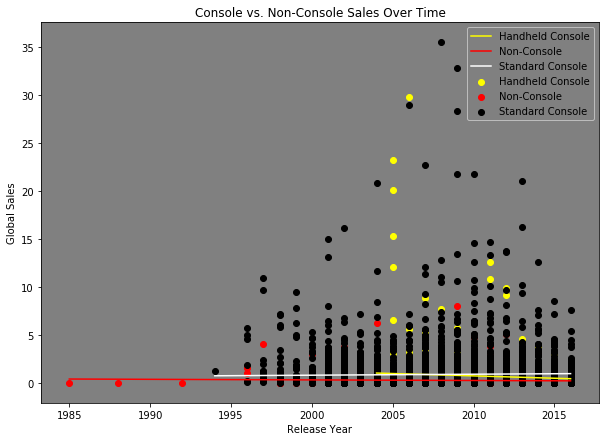

In [4]:
# set plot sizes and colors
pp.rcParams['figure.figsize'] = (10, 7)
pp.rcParams['axes.facecolor'] = 'grey'

# work with a copy of the dataset processed in Step 2
cdf = processing_df.copy()

# for global sales, the max. sale is an extreme outlier
gl_outlier = cdf['Global_Sales'].max()

# optional: this is an informal plot, so let's exclude the outlier
cdf = cdf[cdf['Global_Sales'] != gl_outlier]

# also exclude rows with unavailable (n/a) console types
cdf = cdf[cdf['Platform_Type'] != 'N/A']

# create an empty plot
fig, ax = pp.subplots()

# dataframe based on current one, with year, global sales, console type
temp_df1 = cdf[['Year_of_Release', 'Global_Sales', 'Platform_Type']]

# we'll need an index as we go through the three groups of console types
i = 0

# two arrays of colors - used for differentiating plotted console types 
c1 = ['yellow', 'red', 'white']
c2 = ['yellow', 'red', 'black']

# group both by Console Type (by the three possible console values)
for name, group in temp_df1.groupby(['Platform_Type']):
    
    # simple linear regression with year as predictor x, sales as response y
    line_fit = np.polyfit(group['Year_of_Release'], group['Global_Sales'], deg = 1)
    
    # build the model equation from the results of the regression above
    eq = line_fit[0] * group['Year_of_Release'] + line_fit[1]
    
    # plot the line of best fit resulting from that model equation
    ax.plot(group['Year_of_Release'], eq, color = c1[i], label = name) 
    
    # plot the actual data points, too, and label and color them properly
    ax.scatter(group['Year_of_Release'], 
               group['Global_Sales'], 
               label = name, 
               color = c2[i])
    
    # label axes and title the plot
    ax.set(xlabel = 'Release Year', 
           ylabel = 'Global Sales', 
           title = 'Console vs. Non-Console Sales Over Time')
    
    # show a legend to distinguish the data
    ax.legend()
    
    # increment the index to change the colors used in our plots
    i += 1

##### A brief summary:
It looks like after rising until 2005, all sales - and hence console sales - are going down! 2005 is also when, seemingly, handheld consoles and non-consoles (many of which are hidden in the plot) began to lessen consoles' dominance of the market. Save for a few outliers, the increasing red and yellow markers show that as sales wind down, more of them are non-standard-consoles. So are consoles fading out? Maybe our regression results can shed some light.

Standard consoles' regression line is hard to discern, but decidedly positive. Visually, consoles have been doing well, and likely will not go 'extinct'. Interestingly, the lines for handheld and non-consoles are negative and nearly 0-sloped, respectively. But as we mentioned, these other formats climbed to popularity recently - so even if sales dip at the time that they take over more of the market, it's unfair to lump them into one boat. 

Our introductory graph already has significant flaws! Also, it doesn't consider other factors that may simultaneously affect sales (ratings, etc.). So, let's take a look at more plots to widen our understanding of these trends.
#####     
*__Plot 2.__* A simple variable to account for is the game's genre, or type. Games like shooters, are perpetually popular, whereas beloved simulation games are few and far between. Public tastes in genre change over time, but maybe video games aren't in tune with that - and are losing sales because of it.

You'll be using one key feature that you may want to read up on: a pivot table. Long story short, it's a data structure that can be used, in our case, to make detailed plots. See the following documentation:
    - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html

If companies are losing money because of genre, we need to see how genres are shifting over time, as sales shift. We'll again plot sales vs. time - but via a bar plot, where each bar is split into genre-colors. If one year, only shooters were sold, the bar would be all one color; if only two genres were sold, the bar would be two colors, with the more-sold genre-color taking up more space. This way, we can eyeball how changing genres correlate to video game success.

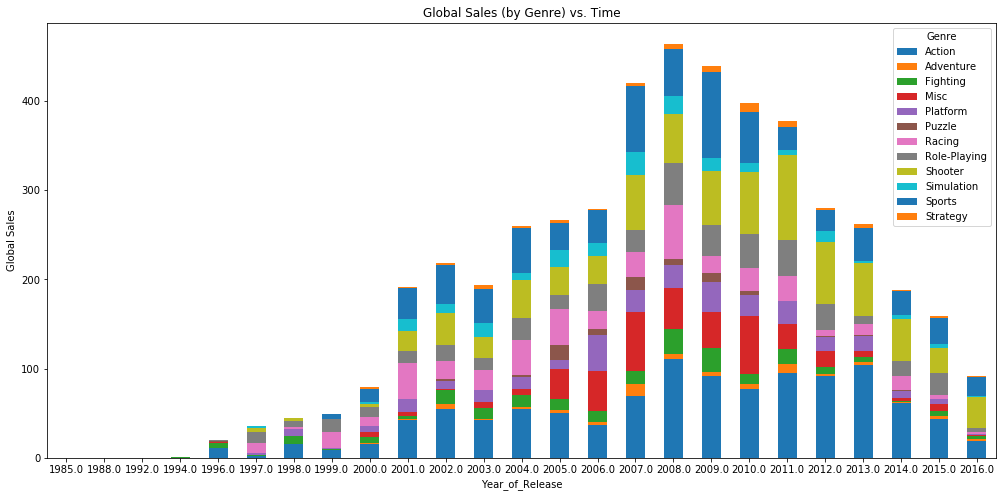

In [5]:
# reset our plots' background color
pp.rcParams['axes.facecolor'] = 'white'

# new empty plot
fig, ax = pp.subplots()

# still plotting sales over time - each year is a bar
x = 'Year_of_Release'
y = 'Global_Sales'

# each bar (amount of sales) is split by the sales per genre that year
split_bar_by = 'Genre'

# make pivot table, fill with desired parameters, store in temporary set
temp_df2 = cdf.pivot_table(index = x, 
                           columns = split_bar_by, 
                           values = y, 
                           
                           # count total sales for each genre in each year
                           aggfunc = 'sum')

# make the bar plot, with some options to make it look pretty
temp_df2.plot.bar(rot = 0, 
                  stacked = True, 
                  figsize = (17,8), 
                  ax = ax)

# title and label our plot 
ax.set(title = 'Global Sales (by Genre) vs. Time', ylabel = 'Global Sales');

##### A brief summary:
We see the same inverted parabolic shape of the data over time, but a pattern for *genre* over time isn't immediately seen. A few individual genres do have unique sales-trajectories over time. For instance, action games' portion of each bar grows steadily until 2013, after which it drops. Adventure games, meanwhile, see a general decline up until 2013, after which they make up scarcely any of the sales. Similar observations can be made for all genres. 

Overall, however, the plot doesn't support a genre-sales relationship too strongly. For the most part, the proportions for each game type seems constant in each bar. How so? In 2001 (relatively low sales), most colors take up the same proportion of the bar as in 2008 (the highest sales). In both years, action and adventure games (combined) compose nearly half of the sales, fighting and racing game proportions are near-identical, and strategy proportions are negligible.

We could visually analyze this chart forever; a follow-up plot could be line graph (try it out!). For instance, if we calculated exact proportions each year, and created a line graph, we could near-exactly test our visual observations about genre changes over time.

For now, however, we will simply perform linear regression on the sales-genre interaction in Step 5. This will give allow us to run statistical tests to mathematically assert the viability of including genre's effect on sales in any model. Now, we move to our final independent variables. 

#####         
*__Plot 3.__* Our last task will be another scatter plot, correlating the effects of scores from users and critics, on global sales. We'll use the same grouping method as before, and the same linear regression procedure. Our result will be two lines of best fit, for the relations between sales and each of the two score types. 

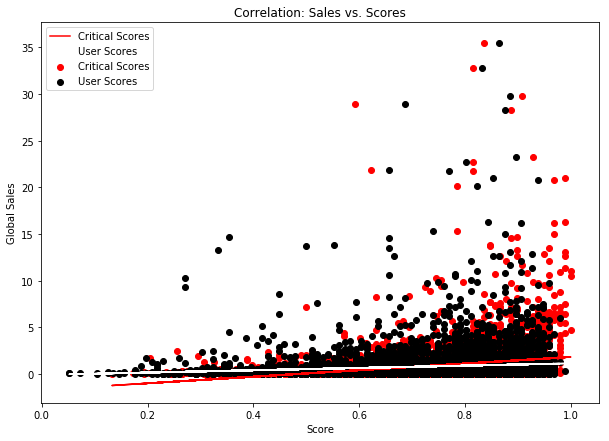

In [6]:
# create an empty plot
fig, ax = pp.subplots()

# simple linear regression with predictor critic-score, response sales
fit_c = np.polyfit(cdf['Critic_Score'], cdf['Global_Sales'], deg = 1)

# simple linear regression with predictor user score, response sales
fit_u = np.polyfit(cdf['User_Score'], cdf['Global_Sales'], deg = 1)

# form model equations from the regression, then label and plot them
ax.plot(cdf['Critic_Score'], 
        fit_c[0] * cdf['Critic_Score'] + fit_c[1], 
        color = 'red', 
        label = 'Critical Scores') 

# the above is for critic scores, and below, for user scores
ax.plot(cdf['User_Score'], 
        fit_u[0] * cdf['User_Score'] + fit_u[1], 
        color = 'white', 
        label = 'User Scores')

# plot and label the data for critic and user scores, and sales
ax.scatter(x = cdf['Critic_Score'], 
           y = cdf['Global_Sales'], 
           color = 'red', 
           label = 'Critical Scores')

# for user scores 
ax.scatter(x = cdf['User_Score'], 
           y = cdf['Global_Sales'], 
           color = 'black', 
           label = 'User Scores')

# provide axis labels, a legend, and a title
ax.set(xlabel = 'Score', ylabel = 'Global Sales', title = 'Correlation: Sales vs. Scores')
ax.legend();

##### A brief summary:
This graph is made a little confusing by the great spread for the sales data. However, a clear clustering is visible; the sales are concentrated between 0 and 15 (million units), and seem to grow as critical ur user scores do. Interestingly, one score does not seem to out-influence the other - the highest sales are near identical, with the critical and user scores for it within a very small margin. Let's look at the regression results.

Sales grow with both ratings at positive  but low-magnitude (slow) rates. The line for user score starts out at higher sales values than the critic-score line. However, the critic-line has a stronger slope (marginally), and ends at higher sales values. The simple regression seems weak - even with a 0-1 change in either score, the model only explains a less-than-5 (million unit) change in sales. However, both lines are still worth analyzing formally in our next step. 

## Step 4: Analysis, Hypothesis Testing, & Machine Learning

Our plotting may have seemd kind of ad-hoc, we can formalize our results here. To do so, we'll perform linear regression in a nwe way. We will include multiple variables at the same time via multiple linear regression, outlined in another PSU lesson-resource below.
    - https://onlinecourses.science.psu.edu/stat501/node/283

We'll use a different library to do so, one that more easily allows for statistical analyses of the produced model. It's documentation is below. In particular, pay attention to the OLS Regression and Regression Summary sections. 
    - http://www.statsmodels.org/stable/index.html

And lastly, we'll assess various statistics (F, R-squared, and more) to compare model success. These are provided by the above library, but if you want to know about the theory behind them, visit the following blog posts about formally using test-statistics:
    - blog.minitab.com/blog/adventures-in-statistics-2/what-is-the-f-test-of-overall-significance-in-regression-analysis
    - blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared ... (link shortened)

We'll summarize what we desire from each statistic as we go on. Mainly, we want certain model-explanability statistics to be high, errors to be low, and p-values (the chances of finding our results like ours when in reality there are no such relationships) to be extremely low. 

We'll try combinations of models, and find the best resulting model statistics. So, we may try single-variable models for sales vs. year, sales vs. genre, etc., and then try sales vs. (year and genre and so on). For our predictive model, we'll chose model with higher test-statistics, and lower p-values and error.
#####       
*__Model 1__*. Our first attempt is something we're familiar with - sales vs. time only. We don't care about the actual coefficient estimates much, as we've seen them already. Let's instead make the model, and output the statistics. Their interpretations are as follows:
    - Need a high R-Square: proportion of the variation in the actual data is explained by the model
    - Need a high F-Statistic: inversely corresponds to p-value (HIGH DESIRED)
    - Need a low (< 0.05) P-value: probability of our results occurring by chance 
    - Want relatively low AIC and BIC: measures of model error strictly relative to other models
    
Note that for p, a (1-alpha) value for p corresponds to 100(1-alpha)% confidence in our model. A standard is to use alpha 0.05, which then corresponds to 95% confidence that our model is correct. This information is available in our earlier statistics resources. 


In [7]:
# import the necessary 
import statsmodels.formula.api as smf

# work with a copy of the dataframe
df = cdf.copy()

# work only with year and sales
df = df[['Year_of_Release', 'Global_Sales']]

# fit a model: sales depends only on year
model1 = smf.ols(formula = 'Global_Sales ~ Year_of_Release', data = df).fit()

# produce statistics regarding model 
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.02326
Date:                Sat, 16 Dec 2017   Prob (F-statistic):              0.879
Time:                        22:08:43   Log-Likelihood:                -11640.
No. Observations:                5786   AIC:                         2.328e+04
Df Residuals:                    5784   BIC:                         2.330e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.5257     11.209      0.225      0.822     -19.448      24.499
Year_of_Release    -0.0009      0.006     -0.153      0.879      -0.012       0.010
==============================================================================
Omnibus:                     8119.103   Durbin-Watson:                   1.566
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2578615.553
Skew:                           8.205   Prob(JB):                         0.00
Kurtosis:                     105.111   Cond. No.                     9.46e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### A brief summary:
Interestingly, the year-model is not statistically significant on its own. It's R-Square is negligible, F-statistic low, and P-value an extreme 0.879. Other individual models - or combined ones - must be used instead. 
#####      
*__Model 2__*. Let's now look at sales vs. genre only. Note that genre is categorical - not to worry! Our library encodes those values and transforms them into usable predictors behind-the-scenes. The same holds for console type, too.

In [8]:
# work with a copy of the dataframe
df = cdf.copy()

# work only with genre and sales
df = df[['Global_Sales', 'Genre']]

# fit a model: sales depends only on genre
model1 = smf.ols(formula = 'Global_Sales ~ Genre', data = df).fit()

# produce statistics regarding model 
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     6.806
Date:                Sat, 16 Dec 2017   Prob (F-statistic):           1.74e-11
Time:                        22:08:43   Log-Likelihood:                -11602.
No. Observations:                5786   AIC:                         2.323e+04
Df Residuals:                    5774   BIC:                         2.331e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.7778      0.048     16.250      0.000       0.684       0.872
Genre[T.Adventure]       -0.4690      0.131     -3.575      0.000      -0.726      -0.212
Genre[T.Fighting]        -0.0598      0.114     -0.524      0.600      -0.284       0.164
Genre[T.Misc]             0.4043      0.110      3.671      0.000       0.188       0.620
Genre[T.Platform]         0.2762      0.117      2.360      0.018       0.047       0.506
Genre[T.Puzzle]          -0.0548      0.192     -0.286      0.775      -0.431       0.321
Genre[T.Racing]           0.0948      0.094      1.004      0.315      -0.090       0.280
Genre[T.Role-Playing]    -0.0061      0.090     -0.067      0.946      -0.183       0.170
Genre[T.Shooter]          0.2235      0.080      2.784      0.005       0.066       0.381
Genre[T.Simulation]      -0.0916      0.119     -0.772      0.440      -0.324       0.141
Genre[T.Sports]           0.0981      0.080      1.232      0.218      -0.058       0.254
Genre[T.Strategy]        -0.5391      0.123     -4.375      0.000      -0.781      -0.298
==============================================================================
Omnibus:                     8118.045   Durbin-Watson:                   1.565
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2597774.622
Skew:                           8.199   Prob(JB):                         0.00
Kurtosis:                     105.501   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### A brief summary: 
R-square is low (0.013), but F-statistic is moderately high (6.806) and p-value far below 0.05 (1.74 x 10 ^ -11). We'll consider this a significant, but not a descriptively powerful model.
#####       
*__Model 3__*. Sales vs. Platform Type only. 

In [9]:
# work with a copy of the dataframe
df = cdf.copy()

# work only with platform and sales
df = df[['Platform_Type', 'Global_Sales']]

# fit a model: sales depends only on year
model1 = smf.ols(formula = 'Global_Sales ~ Platform_Type', data = df).fit()

# produce statistics regarding model 
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     35.69
Date:                Sat, 16 Dec 2017   Prob (F-statistic):           3.94e-16
Time:                        22:08:43   Log-Likelihood:                -11604.
No. Observations:                5786   AIC:                         2.321e+04
Df Residuals:                    5783   BIC:                         2.323e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             0.8157      0.072     11.302      0.000       0.674       0.957
Platform_Type[T.Non-Console]         -0.5389      0.100     -5.413      0.000      -0.734      -0.344
Platform_Type[T.Standard Console]     0.0833      0.077      1.082      0.279      -0.068       0.234
==============================================================================
Omnibus:                     8152.617   Durbin-Watson:                   1.553
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2649480.404
Skew:                           8.263   Prob(JB):                         0.00
Kurtosis:                     106.522   Cond. No.                         7.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### A brief summary: 
Similar results: low R-Square, reasonably high F-statistic, low p-value. A significant - but not powerfully descriptive - model. 
#####      
*__Models 4-5__*. Sales vs. Scores only. 

In [10]:
# work with a copy of the dataframe
df = cdf.copy()

# work only with user score and sales
df = df[['User_Score', 'Global_Sales']]

# fit a model: sales depends only on user score
model1 = smf.ols(formula = 'Global_Sales ~ User_Score', data = df).fit()

# produce statistics regarding model 
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     62.66
Date:                Sat, 16 Dec 2017   Prob (F-statistic):           2.93e-15
Time:                        22:08:43   Log-Likelihood:                -11609.
No. Observations:                5786   AIC:                         2.322e+04
Df Residuals:                    5784   BIC:                         2.323e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0991      0.118     -0.840      0.401      -0.330       0.132
User_Score     1.2336      0.156      7.916      0.000       0.928       1.539
==============================================================================
Omnibus:                     8136.389   Durbin-Watson:                   1.557
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2616724.778
Skew:                           8.235   Prob(JB):                         0.00
Kurtosis:                     105.873   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### A brief summary:
The user-scores model has low R-Square, high F, low p-value. Again, significant and not powerfully descriptive.

In [11]:
# work with a copy of the dataframe
df = cdf.copy()

# work only with critic score and sales
df = df[['Critic_Score', 'Global_Sales']]

# fit a model: sales depends only on critic score
model1 = smf.ols(formula = 'Global_Sales ~ Critic_Score', data = df).fit()

# produce statistics regarding model 
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     489.1
Date:                Sat, 16 Dec 2017   Prob (F-statistic):          4.14e-104
Time:                        22:08:43   Log-Likelihood:                -11405.
No. Observations:                5786   AIC:                         2.281e+04
Df Residuals:                    5784   BIC:                         2.283e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.7071      0.116    -14.672      0.000      -1.935      -1.479
Critic_Score     3.5202      0.159     22.116      0.000       3.208       3.832
==============================================================================
Omnibus:                     8286.421   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3080999.908
Skew:                           8.476   Prob(JB):                         0.00
Kurtosis:                     114.770   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### A brief summary:
Critic score, too, has low R, high F, low p. Again, significant and not powerfully descriptive.
#####       
*__So which features were significant?__* Year wasn't, but Platform, Genre, and Scores were.

*__So what kind of model do we choose?__* Our final models will include these (and only these) variabes.
#####             
##### Linear Regression & Gradient Descent for Selected Model Features:
We won't get into the specifics of gradient descent here, but know that it trains your predictive model by using derivative calculus to minimize certain functions (errors, etc.). An excellent beginner's guide is found here - and includes code! We'll be using another library to perform gradient descent. It does a lot of the work for us, but requires that wee use another library function to scale the data we enter, and the predictoins we receive. This requirement, and more, are in the documentation below (second and third link):
    - https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/
    - http://scikit-learn.org/stable/modules/sgd.html
    - http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
Don't worry if you can't reason about everything - just follow the implications of the results and errors. At the end, we'll use all of our computational functions and create a new column - one that uses our estimated coefficients to calculate predicted sales for each row of independent variables. 

In [12]:
# import necessary libraries
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# this is just to avoid irrelevant warnings 
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning) 

# copy dataset
dat = cdf.copy()

# filter out unavailable row-values
dat = dat[dat['Platform_Type'] != 'N/A']

# save a copy
df = dat.copy()

# turn year column into true numeric values 
dat['Year_of_Release'] = dat['Year_of_Release'].map(lambda x: float(x))

# assign numbers to each unique value in platform type 
# make new columns for each unique value: 1 if that row 'is' that platform type, else 0
dat['Handheld'] = dat['Platform_Type'].map(lambda x: 1 if x == 'Handheld Console' else 0)
dat['Non-Console'] = dat['Platform_Type'].map(lambda x: 1 if x == 'Non-Console' else 0)
dat['Standard'] = dat['Platform_Type'].map(lambda x: 1 if x == 'Standard Console' else 0)

# assign numbers to each unique value in genre column
# make new columns for each unique value: 1 if that row 'is' that platform type, else 0
dat['Simulation'] = dat['Genre'].map(lambda x: 1 if x == 'Simulation' else 0)
dat['Shooter'] = dat['Genre'].map(lambda x: 1 if x == 'Shooter' else 0)
dat['Fighting'] = dat['Genre'].map(lambda x: 1 if x == 'Fighting' else 0)
dat['Role-Playing'] = dat['Genre'].map(lambda x: 1 if x == 'Role-Playing' else 0)
dat['Misc'] = dat['Genre'].map(lambda x: 1 if x == 'Misc' else 0)
dat['Action'] = dat['Genre'].map(lambda x: 1 if x == 'Action' else 0)
dat['Puzzle'] = dat['Genre'].map(lambda x: 1 if x == 'Puzzle' else 0)
dat['Racing'] = dat['Genre'].map(lambda x: 1 if x == 'Racing' else 0)
dat['Platform'] = dat['Genre'].map(lambda x: 1 if x == 'Platform' else 0)
dat['Adventure'] = dat['Genre'].map(lambda x: 1 if x == 'Adventure' else 0)
dat['Strategy'] = dat['Genre'].map(lambda x: 1 if x == 'Strategy' else 0)
dat['Sports'] = dat['Genre'].map(lambda x: 1 if x == 'Sports' else 0)

# all columns we'll be using for our predictions
tempX = dat[['Year_of_Release','Critic_Score', 'User_Score', 'Simulation', 'Shooter', 
             'Fighting', 'Role-Playing', 'Misc', 'Action', 'Puzzle', 'Racing', 
             'Platform', 'Adventure', 'Strategy', 'Sports', 
             'Handheld', 'Non-Console','Standard']]

# make a formal set of predictors X 
X = np.array(np.array(tempX.iloc[0]))

# set the proper shape for our predictor matrix
for x in range(1, tempX.shape[0]):
    X = np.append(X, tempX.iloc[x])

# setting the proper dimensions for the matrix
X = X.reshape(5786,18)
  
# assign the response variable y (sales), with options needed by our library 
y = np.array([[e] for e in dat['Global_Sales']])
y = np.asarray(dat['Global_Sales'], dtype="|S6")

# perform the library function to predict using gradient descent
clf = SGDClassifier(loss = "hinge", penalty = "l2") 
clf.fit(X, y)

# copy our working dataset
dat2 = dat.copy()

dat2 = dat2[['Year_of_Release','Critic_Score', 'User_Score', 
             'Simulation', 'Shooter', 'Fighting', 
             'Role-Playing', 'Misc', 'Action', 'Puzzle', 
             'Racing', 'Platform', 'Adventure', 'Strategy', 
             'Sports', 'Handheld', 'Non-Console','Standard']]

# call scaling function
sc = StandardScaler()

# determine how the data needs to be scaled
sc.fit(dat2)

# perform scaling transformation 
dat2 = sc.transform(dat2)

# empty predictions list
pred = []

# index for while loop
i = 0

# for each element of the data
while i < len(dat2):
    
    # x is the predictors, then call function for calculating y
    x = dat2[i]
    m = clf.coef_[0]
    y = np.dot(x, m.T)
    
    # store prediction and keep looping 
    pred.append(y)
    i += 1

# call scaling function and transformation for resulting predictions    
sc.fit(pred)
pred = sc.transform(pred)

# add this to a simpler copy of our earlier dataset
df['Predictions'] = pred
    
# output a portion of the new dataset, to demonstrate predictions
df.head(n = 10)

,Name,Platform,Year_of_Release,Genre,NA_Sales,Global_Sales,Critic_Score,User_Score,Platform_Type,Predictions
14472,Alter Ego,PC,1985.0,Simulation,0.00,0.03,0.602041,0.604167,Non-Console,6.215332
14623,SimCity,PC,1988.0,Simulation,0.00,0.03,0.653061,0.229167,Non-Console,5.532201
14612,Doom,PC,1992.0,Shooter,0.02,0.03,0.867347,0.854167,Non-Console,4.543241
1567,Battle Arena Toshinden,PlayStation,1994.0,Fighting,0.39,1.27,0.704082,0.656250,Standard Console,2.971089
1160,Diablo,PC,1996.0,Role-Playing,0.01,1.59,0.959184,0.906250,Non-Console,3.619966
903,PaRappa The Rapper,PlayStation,1996.0,Misc,0.26,1.92,0.938776,0.770833,Standard Console,2.555990
203,Resident Evil,PlayStation,1996.0,Action,2.05,5.05,0.928571,0.937500,Standard Console,2.579901
9215,Super Puzzle Fighter II Turbo,PlayStation,1996.0,Puzzle,0.08,0.14,0.846939,0.770833,Standard Console,2.585679
153,Tekken 2,PlayStation,1996.0,Fighting,2.26,5.74,0.908163,0.927083,Standard Console,2.500637
229,Tomb Raider,PlayStation,1996.0,Action,2.29,4.63,0.928571,0.895833,Standard Console,2.581019


##### The final step: error analysis. 
We just need to see how our predictions fared against the actual values. This way, we can see if they would be any good at predicting *future* values. We'll calculate residuals, or the difference between actual and predicted values, for each row. We'll plot these residuals against our predictions, and anticipate (ideally) residuals that are near 0, and not distributed in any mathematical pattern. If this is not the case, that means the difference between our predictions and actual values are likely high, and due to some hidden independent feature. Read more about residual plots here:
    - http://stattrek.com/statistics/dictionary.aspx?definition=Residual%20plot 

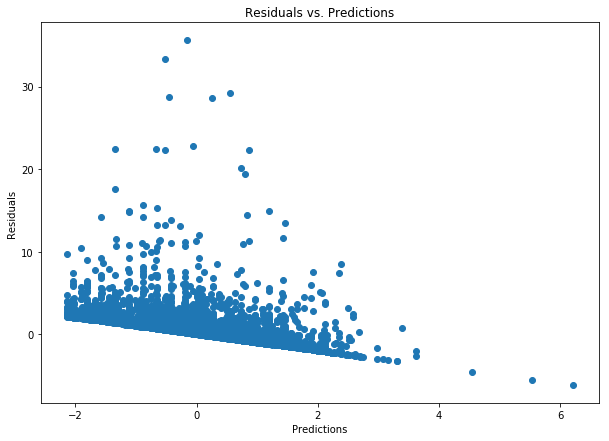

In [13]:
# empty lists
gsl = []
pre = []
res = []

# fill a list with all global sales
for item in df['Global_Sales']:
    gsl.append(float(item))

# fill a list with all predictions
for item in df['Predictions']:
    pre.append(float(item))

# set index to 0 for while loop
i = 0

# calculate each residual (actual - predicted)
while i < len(pre):
    res.append(gsl[i] - pre[i])
    i += 1

# new empty plot
fig, ax = pp.subplots()

# plot residuals vs. predictions
ax.scatter(x = pre, y = res)

# label axes and title
ax.set(title = 'Residuals vs. Predictions', 
       ylabel = 'Residuals',
       xlabel = 'Predictions',
      );

##### A brief summary:
Our residuals *are* alarming; they're all positive. Which means the differece is always positive, or that the model always has smaller predictions - it always underestimates. While all positive, however, they do seem randomly distributed - so we didn't miss any key features within the data that might be affecting sales. Also, the residuals are *somewhat* close to 0, but not as close as we would like (keep in midn that the units are still millions in sales). 

As it turns out, our model captures all the influential predictor variables reasonably well, but is unable to classify the categorical values properly - resulting in a significantly underestimating set of predictions. So, the methodology and data we employed can definitely be improved on. 

## Step 5: Insights & Investigative Flaws

##### Answering our questions...
Is the console industry dying? Short answer: dying is an ill-fitting, extreme term. In the scope of our data, console sales are being chipped away by non-console and handheld platforms (think PC and Nintendo Switch). 

What factors contribute to console games' (or others') success? These sales seem to rise and fall with time - so that's not a steady predictor. But genre, user scores, critic scores, and (to some extend) platform type all influence sales in slight ways. Put together, they can have significant influences on sales.

Then, we *can* use those features to model and predict sales - but not as well as we would like. We grossly underestimate most data, but capture the influential predictors well. So, we may still need to gathe more data and consider more features, or perhaps more combinations of features. A more complete dataset (and methodology) could definitely be built from this work.

##### Flaws
Some weakness with these models included limitations in the dataset, as not every single video game is included in the dataset (even if a strong portion of all major-brand ones were). Furthermore, of the dataset, some data had missing values, which were removed and further reduced the dataset. In addition, the only representation of non-consoles was computer games, while other categories had multiple representations - hence we cannot say we challenged console sales against all forms of 'modern' gaming. 

##### Improvements & Further Analysis
More data is always helpful. You can dive much deeper into this topic by re-scraping data from VGChartz and Metacritic to include more data, especially recent data. Consider other features (total possible play hours in a game, price, and more), or perform a different type of prediction. 

You could, for instance, specifically predict sales by platform type - that is, perform a classification for predicted sales and console category. In any case, you should try to replicate our results, and then try a different approach than ours! 
    - http://www.vgchartz.com/gamedb/
    - http://www.metacritic.com/game
    - https://github.com/wtamu-cisresearch/scraper
